# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/joshu/Downloads/Data/EDA_human_temperature/data/human_body_temperature.csv')

In [10]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [66]:
mean = np.mean(df.temperature)
sd = np.std(df.temperature)
n = len(df.temperature)

# 1. Is the distribution of body temperatures normal?

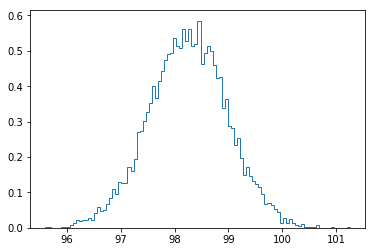

In [19]:
# Create a histogram to see if the distribution looks normal
plt.hist(samples, bins=100, normed=True, histtype='step')
plt.show()

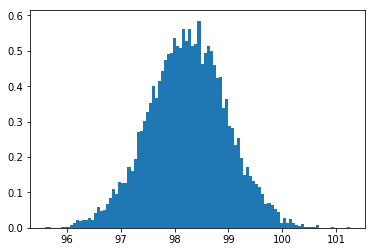

In [20]:
plt.hist(samples, bins=100, normed=True)
plt.show()

In [38]:
# Create a CDF function

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [40]:
# Generate a sample that has the same distribution as the temperature data
np.random.seed(1)
norm = np.random.normal(mean, sd, 10000)

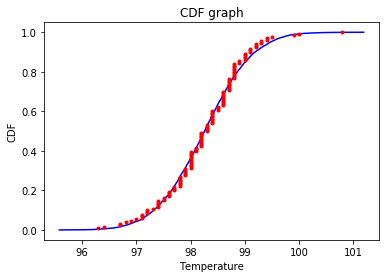

In [46]:
x_temp, y_temp = ecdf(df.temperature)
x_norm, y_norm = ecdf(norm)

_ = plt.plot(x_norm, y_norm, color='blue')
_ = plt.plot(x_temp, y_temp, marker='.', linestyle ='none', color='red')

_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')
_ = plt.title('CDF graph')

The data has a bell-shaped curve and is symmetrical in the histogram. It also has a normal distribution in the CDF graph.

# 2. Is the sample size large? Are the observations independent?

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


Yes, sample size is large since the number of observations for 'temperature' is over 30. The observations are independent since they are taken from different people.

# 3. Is the true population mean really 98.6 degrees F?

# First, try a bootstrap hypothesis test.

Let the null hypothesis be the claim that the true population mean is equal to 98.6 degrees F

In [62]:
# Define boostrapping functions

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [64]:
# Generate sample data assuming the null hypothesis is true

new_temp = df.temperature - mean + 98.6
bs_replicates = draw_bs_reps(new_temp, np.mean, 10000)

# Compute the p-value

p = np.sum(bs_replicates <= mean)/10000
print('p = ',p)

p =  0.0


Since the p-value is 0, the null hypothesis is false and the true mean is not equal to 98.6.

# Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

For this type of question, I would use a 1-sample test since there is only 1 group of data for the temperature.

# In this situation, is it appropriate to use the  tt  or  zz  statistic?

I would also use a t-test since there is an unknown population standard deviation. We only know that the true population mean is 98.6 degrees F.

In [127]:
t = (mean - 98.6) / (sd/np.sqrt(n))
p1 = np.sum(np.abs(bs_replicates) <= t) / len(bs_replicates)

print('t-statistic: ', t)
print('p-value: ', p1)

t-statistic:  -5.475925202078116
p-value:  0.0


# Now try using the other test. How is the result be different? Why?

The difference between using the t-test and z-test would be that we will have to use the standard error mean to approximate the population standard deviation. This will result in basically the same p-value since they are both extremely miniscule values. 

In [128]:
z = (mean - 98.6) / (sd/np.sqrt(n)) # Notice this formula is no different than the t-statistic formula

p2 = np.sum(np.abs(bs_replicates) <= z) / len(bs_replicates)

print('z-statistic: ', z)
print('p-value: ', p2)

z-statistic:  -5.475925202078116
p-value:  0.0


# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

# Which one is the correct one to use?

Since n = 10, we will be using the t-test.

In [139]:
# Generate sample data with size 10

np.random.seed(42)
sample = np.random.choice(df.temperature, size=10)

# Shift the data to match the null hypothesis

new_sample = sample - np.mean(sample) + 98.6

# Definte t-test statistic function
def t_stat(data, mu=98.6):
    return (np.mean(data) - mu) / (np.std(data)/np.sqrt(len(data)))

# Perform t-test

t1 = t_stat(sample)
bs_t_reps = draw_bs_reps(new_sample, t_stat, 10000)
p3 = np.sum(np.abs(bs_t_reps) >= np.abs(t1)) / len(bs_t_reps)

print('t-statistic: ', t1)
print('p-value: ', p3)

t-statistic:  -3.260780417008125
p-value:  0.0137


In [141]:
# Define z-test statistic function
def z_stat(data, mu=98.6, std = sd):
    return (np.mean(data) - mu) / (std / np.sqrt(len(data)))

# Perform z-test

z1 = z_stat(sample)
bs_z_reps = draw_bs_reps(new_sample, z_stat, 10000)
p4 = np.sum(np.abs(bs_z_reps) >= np.abs(z1)) / len(bs_z_reps)

print('z-statistic: ', z1)
print('p-value: ', p4)

z-statistic:  -2.3813708340316593
p-value:  0.0012


# What do you notice?

The p-value for the z-test is 10 times smaller than the p-value for the t-test. This further proves that the t-test should be used for smaller samples.

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [99]:
# Margin of Error
z_val = 1.96 # z-value corresponding to 95% confidence interval
SE = sd/np.sqrt(n) # This is the standard error
ME = z_val * SE 
print('Margin of error is: ', ME)


# 95% Confidence Interval on the mean 
CI = np.percentile(df['temperature'], [2.5, 97.5])
print('The 95% Confidence Interval is: ', CI[0], ',', CI[1])

Margin of error is:  0.125550964802579
The 95% Confidence Interval is:  96.7225 , 99.4775


We should consider any temperature less than 96.7225 and greater than 99.4775 to be "abnormal".

# 6. Is there a significant difference between males and females in normal temperature?

To begin, it is a good idea to do an EDA to scout how the data looks graphically.

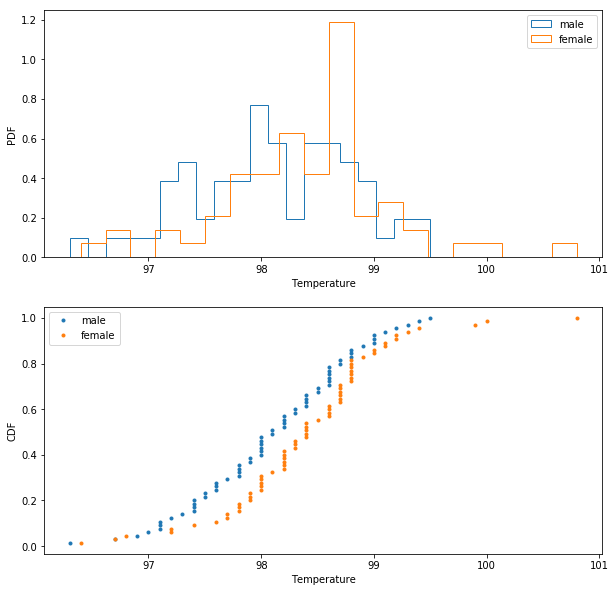

In [144]:
# Isolate data by gender

male = df[df.gender == 'M']
female = df[df.gender == 'F']

# Extract the means

m_mean = np.mean(male.temperature)
f_mean = np.mean(female.temperature)

# Compute the CDFs

x_male, y_male = ecdf(male.temperature)
x_female, y_female = ecdf(female.temperature)

# We will use a boxplot and CDF graph to do a quick observation of the data

plt.figure(figsize=(10,10))
_ = plt.subplot(2,1,1)
_ = plt.hist(male.temperature, bins=20, normed=True, histtype='step')
_ = plt.hist(female.temperature, bins=20, normed=True, histtype='step')
_ = plt.xlabel('Temperature')
_ = plt.ylabel ('PDF')
_ = plt.legend(('male', 'female'))

_ = plt.subplot(2,1,2)
_ = plt.plot(x_male, y_male, marker='.', linestyle='none')
_ = plt.plot(x_female, y_female, marker = '.', linestyle = 'none')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')
_ = plt.legend(('male', 'female'))

We will do a permutation test because resampling the observed data is the best way to simulate the null hypothesis. 

Null Hypothesis: There are no major differences in the distribution of male and female temperatures. 

In [117]:
# Define permutation functions:
def difference_of_means(data_1, data_2):
    """Return the difference in means of two arrays."""

    # The difference of means of data_1, data_2:
    return np.mean(data_1) - np.mean(data_2)

def permutation_sample(data1, data2):
    """Return a permutation sample from two data sets."""

    # Concatenate the data sets:
    data = np.concatenate((data1, data2))

    # Permute the concatenated array:
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two samples:
    permutation_sample_1 = permuted_data[:len(data1)]
    permutation_sample_2 = permuted_data[len(data1):]

    return permutation_sample_1, permutation_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):
    """Draw multiple permutation replicates."""

    # Initialize array of permutation replicates:
    permutation_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation samples:
        permutation_sample_1, permutation_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic:
        permutation_replicates[i] = func(permutation_sample_1, permutation_sample_2)

    return permutation_replicates

In [123]:
# Compute difference of temperature means between male and female
temp_diff = difference_of_means(male.temperature, female.temperature)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(male.temperature, female.temperature, difference_of_means, size=10000)

# Compute p-value: p
p = np.sum(abs(perm_replicates) >= abs(temp_diff)) / len(perm_replicates)

print('Difference in Temperature: ', temp_diff)
print('p-value =', p)

Difference in Temperature:  -0.289230769230727
p-value = 0.0236


Since the p-value of 0.0236 is less than 0.05, we will reject the null hypothesis and conclude that the body temperatures of male and female are significantly different. While the average body temperature is said to be 98.6, the conclusion of this report shows that there should be an emphasis on the type of gender because there is a significant difference in the body temperatures for males and females. 